In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mp.mp.dps = 100  # high precision for reference and tail calculations

# High-precision reference values (reuse integrands from earlier cell)
I1_ref = mp.pi / 10
I2_ref = mp.quad(lambda x: mp.log(x) / (1 + 25 * x * x), [0, 1])

# Helper: composite trapezoidal rule on [a,b] with n subintervals

def trapezoid_uniform(f, a: float, b: float, n: int) -> float:
    x = np.linspace(a, b, n + 1)
    y = f(x)
    h = (b - a) / n
    return float(h * (0.5 * y[0] + y[1:-1].sum() + 0.5 * y[-1]))


# Integral I1: truncate at L and add analytic tail R1(L)
L = 4.0
f1_np = lambda x: 1.0 / (1.0 + 25.0 * x * x)
R1_tail = float(I1_ref - (mp.atan(5 * L) / 5))

# Integral I2: change variable x = e^{-t} => f(t) = (-t e^{-t}) / (1 + 25 e^{-2t})
T = 12.0
f2_t_np = lambda t: (-t * np.exp(-t)) / (1.0 + 25.0 * np.exp(-2.0 * t))
R2_tail = float(mp.quad(lambda t: (-t * mp.e**(-t)) / (1 + 25 * mp.e**(-2 * t)), [T, mp.inf]))

n_values = [2**k for k in range(4, 20)]  # 16, 32, ..., 4096
records = []

for n in n_values:
    I1_trap = trapezoid_uniform(f1_np, 0.0, L, n) + R1_tail
    I2_trap = trapezoid_uniform(f2_t_np, 0.0, T, n) + R2_tail
    records.append({
        "n": n,
        "I1_trap": I1_trap,
        "I1_err": abs(I1_trap - float(I1_ref)),
        "I2_trap": I2_trap,
        "I2_err": abs(I2_trap - float(I2_ref)),
    })

trap_df = pd.DataFrame(records)
trap_df

,n,I1_trap,I1_err,I2_trap,I2_err
0,16,0.318303,4.143418e-03,-0.543675,1.769591e-03
1,32,0.314185,2.543250e-05,-0.544995,4.492557e-04
2,64,0.314159,4.036899e-07,-0.545332,1.127383e-04
3,128,0.314159,1.012173e-07,-0.545416,2.821084e-05
4,256,0.314159,2.530456e-08,-0.545438,7.054348e-06
5,512,0.314159,6.326154e-09,-0.545443,1.763689e-06
6,1024,0.314159,1.581539e-09,-0.545444,4.409287e-07
7,2048,0.314159,3.953848e-10,-0.545444,1.102326e-07
8,4096,0.314159,9.884621e-11,-0.545445,2.755817e-08
9,8192,0.314159,2.471157e-11,-0.545445,6.889544e-09


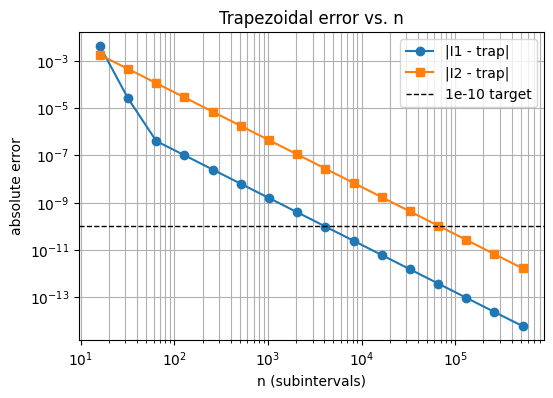

,n,I1_trap,I1_err,I2_trap,I2_err
0,16,0.318303,4.143418e-03,-0.543675,1.769591e-03
1,32,0.314185,2.543250e-05,-0.544995,4.492557e-04
2,64,0.314159,4.036899e-07,-0.545332,1.127383e-04
3,128,0.314159,1.012173e-07,-0.545416,2.821084e-05
4,256,0.314159,2.530456e-08,-0.545438,7.054348e-06
5,512,0.314159,6.326154e-09,-0.545443,1.763689e-06
6,1024,0.314159,1.581539e-09,-0.545444,4.409287e-07
7,2048,0.314159,3.953848e-10,-0.545444,1.102326e-07
8,4096,0.314159,9.884621e-11,-0.545445,2.755817e-08
9,8192,0.314159,2.471157e-11,-0.545445,6.889544e-09


In [19]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.loglog(trap_df["n"], trap_df["I1_err"], marker="o", label="|I1 - trap|")
ax.loglog(trap_df["n"], trap_df["I2_err"], marker="s", label="|I2 - trap|")
ax.axhline(1e-10, color="k", linestyle="--", linewidth=1, label="1e-10 target")
ax.set_xlabel("n (subintervals)")
ax.set_ylabel("absolute error")
ax.set_title("Trapezoidal error vs. n")
ax.grid(True, which="both")
ax.legend()
plt.show()

trap_df